In [63]:

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [64]:
#loading data
df=pd.read_csv("Flight.csv")
df

,Unnamed: 0,Plane Name,Departure Time,Arrival Time,Departure City,Arrival City,Total Time Taken,Numbers of stops,Fare
0,0,IndiGo,13:40\nNew Delhi,19:50\nBangalore,New Delhi,Bangalore,6h 10m,6h 10m\n1 Stop,"3,170"
1,1,IndiGo,10:15\nNew Delhi,16:40\nBangalore,New Delhi,Bangalore,6h 25m,6h 25m\n1 Stop,"3,170"
2,2,IndiGo,06:45\nNew Delhi,13:20\nBangalore,New Delhi,Bangalore,6h 35m,6h 35m\n1 Stop,"3,170"
3,3,IndiGo,08:25\nNew Delhi,15:40\nBangalore,New Delhi,Bangalore,7h 15m,7h 15m\n1 Stop,"3,170"
4,4,IndiGo,14:00\nNew Delhi,22:25\nBangalore,New Delhi,Bangalore,8h 25m,8h 25m\n1 Stop,"3,170"
...,...,...,...,...,...,...,...,...,...
1794,253,Vistara,17:35\nKolkata,14:10\n+ 1 day\nNew Delhi,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1795,254,Vistara,17:35\nKolkata,14:10\n+ 1 day\nNew Delhi,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1796,255,Vistara,17:35\nKolkata,14:10\n+ 1 day\nNew Delhi,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1797,256,Vistara,17:35\nKolkata,14:10\n+ 1 day\nNew Delhi,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"


In [65]:
#droping Unnamed: 0
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Plane Name,Departure Time,Arrival Time,Departure City,Arrival City,Total Time Taken,Numbers of stops,Fare
0,IndiGo,13:40\nNew Delhi,19:50\nBangalore,New Delhi,Bangalore,6h 10m,6h 10m\n1 Stop,"3,170"
1,IndiGo,10:15\nNew Delhi,16:40\nBangalore,New Delhi,Bangalore,6h 25m,6h 25m\n1 Stop,"3,170"
2,IndiGo,06:45\nNew Delhi,13:20\nBangalore,New Delhi,Bangalore,6h 35m,6h 35m\n1 Stop,"3,170"
3,IndiGo,08:25\nNew Delhi,15:40\nBangalore,New Delhi,Bangalore,7h 15m,7h 15m\n1 Stop,"3,170"
4,IndiGo,14:00\nNew Delhi,22:25\nBangalore,New Delhi,Bangalore,8h 25m,8h 25m\n1 Stop,"3,170"
...,...,...,...,...,...,...,...,...
1794,Vistara,17:35\nKolkata,14:10\n+ 1 day\nNew Delhi,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1795,Vistara,17:35\nKolkata,14:10\n+ 1 day\nNew Delhi,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1796,Vistara,17:35\nKolkata,14:10\n+ 1 day\nNew Delhi,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1797,Vistara,17:35\nKolkata,14:10\n+ 1 day\nNew Delhi,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"


In [66]:
#the arival and departure time is in 24 hour format
#The duration is in hours and minutes, will convert in into minutes

In [67]:
#checking for null values
df.isnull().sum()

Plane Name          0
Departure Time      0
Arrival Time        0
Departure City      0
Arrival City        0
Total Time Taken    0
Numbers of stops    0
Fare                0
dtype: int64

In [68]:
#there is no null values

In [69]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Plane Name        1799 non-null   object
 1   Departure Time    1799 non-null   object
 2   Arrival Time      1799 non-null   object
 3   Departure City    1799 non-null   object
 4   Arrival City      1799 non-null   object
 5   Total Time Taken  1799 non-null   object
 6   Numbers of stops  1799 non-null   object
 7   Fare              1799 non-null   object
dtypes: object(8)
memory usage: 112.6+ KB


In [70]:
#there are multiples columns as oject which sholud be int or float

In [71]:

#cleaning data
df["Departure Time"]=df["Departure Time"].str.split("\n").str[0]
df['Arrival Time'] = df["Arrival Time"].str.split("\n").str[0]
df["Departure Time"]=df["Departure Time"].str.split(":").str[0]
df['Arrival Time'] = df["Arrival Time"].str.split(":").str[0]
df["Numbers of stops"] = df["Numbers of stops"].str.split("\n").str[1]


,Plane Name,Departure Time,Arrival Time,Departure City,Arrival City,Total Time Taken,Numbers of stops,Fare
0,IndiGo,13,19,New Delhi,Bangalore,6h 10m,6h 10m\n1 Stop,"3,170"
1,IndiGo,10,16,New Delhi,Bangalore,6h 25m,6h 25m\n1 Stop,"3,170"
2,IndiGo,06,13,New Delhi,Bangalore,6h 35m,6h 35m\n1 Stop,"3,170"
3,IndiGo,08,15,New Delhi,Bangalore,7h 15m,7h 15m\n1 Stop,"3,170"
4,IndiGo,14,22,New Delhi,Bangalore,8h 25m,8h 25m\n1 Stop,"3,170"
...,...,...,...,...,...,...,...,...
1794,Vistara,17,14,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1795,Vistara,17,14,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1796,Vistara,17,14,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"
1797,Vistara,17,14,Kolkata,New Delhi,20h 35m,20h 35m\n2 Stop(s),"10,327"


In [73]:
#craeting funtion to convert departure and arival time 
#This function takes the flight Departure time and convert into appropriate format.
def flight_dep_time(X):
    
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [74]:

#departure time/arrival time
df['Departure Time'] = df['Departure Time'].apply(flight_dep_time)
df['Arrival Time'] = df['Arrival Time'].apply(flight_dep_time)
df

In [77]:
#spliting duration in hours and minutes and converting them into int type
df["H"]=df["Total Time Taken"].str.split("h").str[0]
df["M"]=df["Total Time Taken"].str.split("h").str[1]
df["M"]=df["M"].str.split("m").str[0]
df["M"].fillna(0,inplace=True)
df.drop(df.index[df['H'] == '5m'], inplace = True)
df.replace(to_replace="", value='0', inplace=True)
df["H"]=df["H"].astype(int)
df["M"]=df["M"].astype(int)

In [78]:
df

,Plane Name,Departure Time,Arrival Time,Departure City,Arrival City,Total Time Taken,Numbers of stops,Fare,H,M
0,IndiGo,afternoon,evening,New Delhi,Bangalore,6h 10m,1 Stop,"3,170",6,10
1,IndiGo,morning,afternoon,New Delhi,Bangalore,6h 25m,1 Stop,"3,170",6,25
2,IndiGo,morning,afternoon,New Delhi,Bangalore,6h 35m,1 Stop,"3,170",6,35
3,IndiGo,morning,afternoon,New Delhi,Bangalore,7h 15m,1 Stop,"3,170",7,15
4,IndiGo,afternoon,evening,New Delhi,Bangalore,8h 25m,1 Stop,"3,170",8,25
...,...,...,...,...,...,...,...,...,...,...
1794,Vistara,afternoon,afternoon,Kolkata,New Delhi,20h 35m,2 Stop(s),"10,327",20,35
1795,Vistara,afternoon,afternoon,Kolkata,New Delhi,20h 35m,2 Stop(s),"10,327",20,35
1796,Vistara,afternoon,afternoon,Kolkata,New Delhi,20h 35m,2 Stop(s),"10,327",20,35
1797,Vistara,afternoon,afternoon,Kolkata,New Delhi,20h 35m,2 Stop(s),"10,327",20,35


In [79]:
#adding hours and minutes to form time taken
df["Time_taken"]=df["H"]*60 + df["M"]
df.head()

,Plane Name,Departure Time,Arrival Time,Departure City,Arrival City,Total Time Taken,Numbers of stops,Fare,H,M,Time_taken
0,IndiGo,afternoon,evening,New Delhi,Bangalore,6h 10m,1 Stop,"3,170",6,10,370
1,IndiGo,morning,afternoon,New Delhi,Bangalore,6h 25m,1 Stop,"3,170",6,25,385
2,IndiGo,morning,afternoon,New Delhi,Bangalore,6h 35m,1 Stop,"3,170",6,35,395
3,IndiGo,morning,afternoon,New Delhi,Bangalore,7h 15m,1 Stop,"3,170",7,15,435
4,IndiGo,afternoon,evening,New Delhi,Bangalore,8h 25m,1 Stop,"3,170",8,25,505


In [80]:
#droping unneccesary columns
df.drop(["Total Time Taken","H","M"],axis=1,inplace=True)
df

In [82]:
df["Fare"]=[x.replace(",","") for x in df["Fare"]]
df["Fare"]=df["Fare"].astype(int)

<AxesSubplot:xlabel='Plane Name', ylabel='count'>

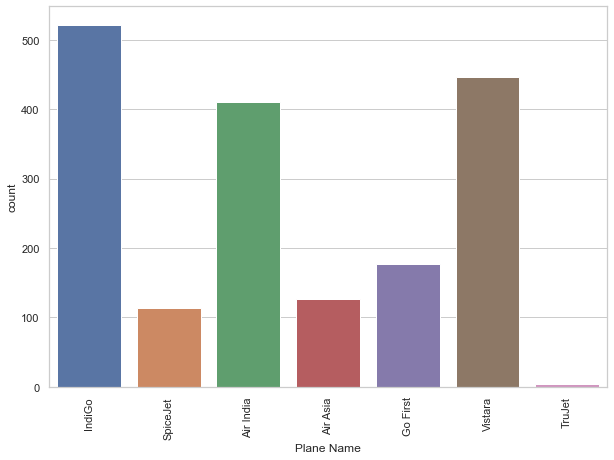

In [84]:
#Plane name
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("Plane Name", data=df)

In [ ]:
#indigo provides most number of services while trujet provides least number of services

<AxesSubplot:xlabel='Departure Time', ylabel='count'>

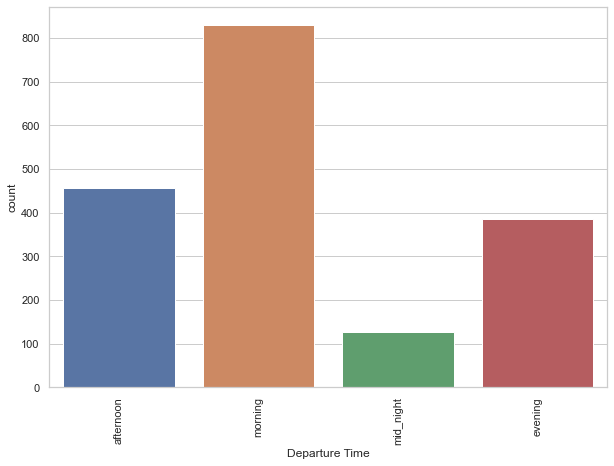

In [85]:
#Departure Time
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("Departure Time", data=df)

In [ ]:
#most flights depart in the morning

<AxesSubplot:xlabel='Arrival Time', ylabel='count'>

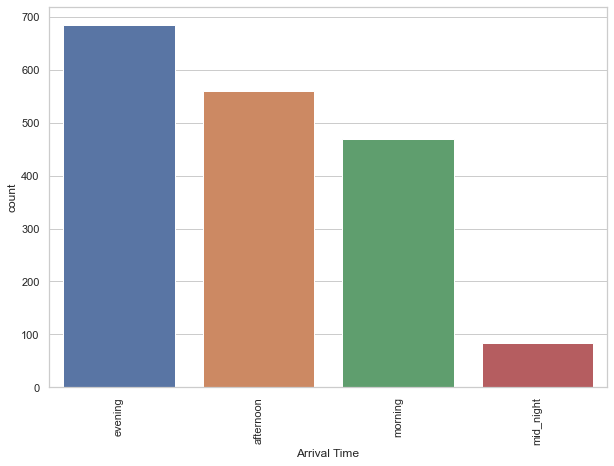

In [86]:
#Arrival Time
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("Arrival Time", data=df)

In [ ]:
#most flight arrives in the evening

<AxesSubplot:xlabel='Departure City', ylabel='count'>

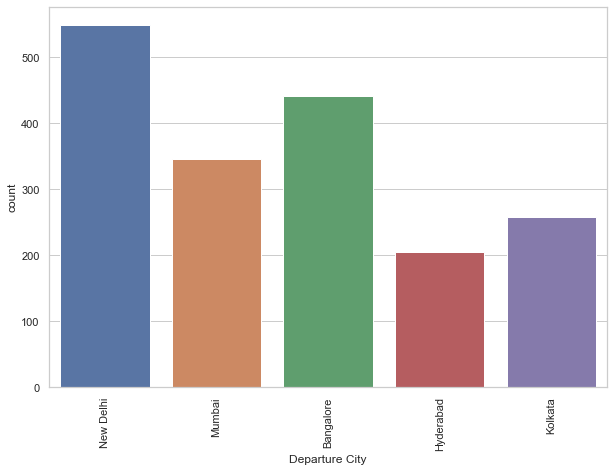

In [87]:
#Departure City
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("Departure City", data=df)

In [ ]:
#from the collected data New delhi is the has the most departed flight

<AxesSubplot:xlabel='Arrival City', ylabel='count'>

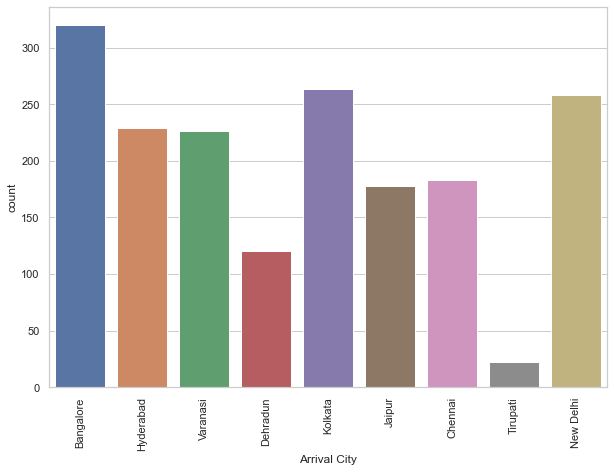

In [88]:
#Arrival City
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("Arrival City", data=df)

In [ ]:
#from the collected data New delhi is the has the most arrived flight

<AxesSubplot:xlabel='Numbers of stops', ylabel='count'>

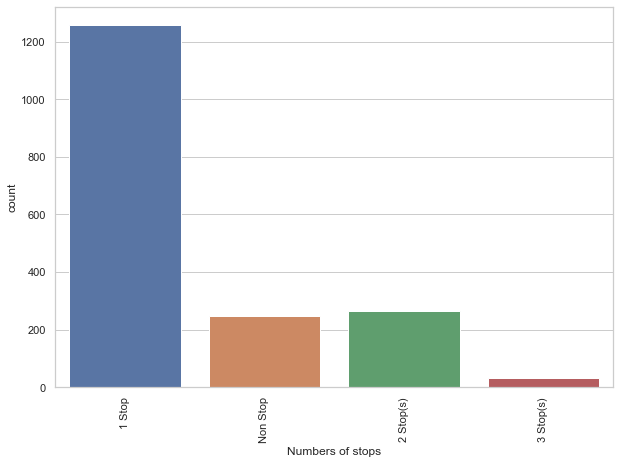

In [89]:
#Numbers of stops
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot("Numbers of stops", data=df)

In [ ]:
#majority of flights have one stops

In [90]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

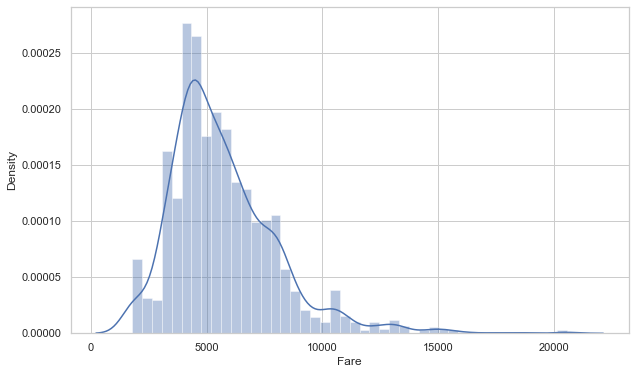

In [91]:
#Fare
histogram(df,"Fare")

In [ ]:
#the prices lies b/w 5k-7k. also there are few flights with higher price

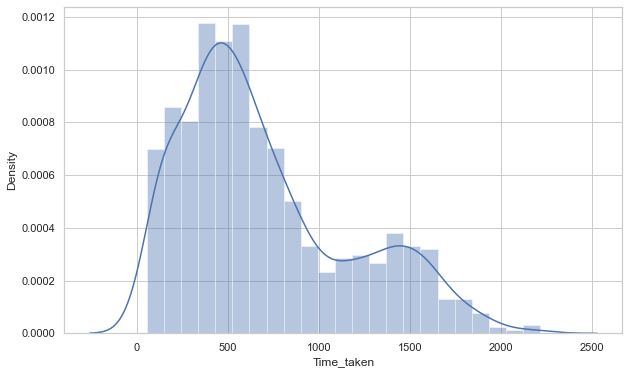

In [92]:
#Time_taken(in minutes)
histogram(df,"Time_taken")

In [ ]:
#majority of the flights takes average 500-800 minute

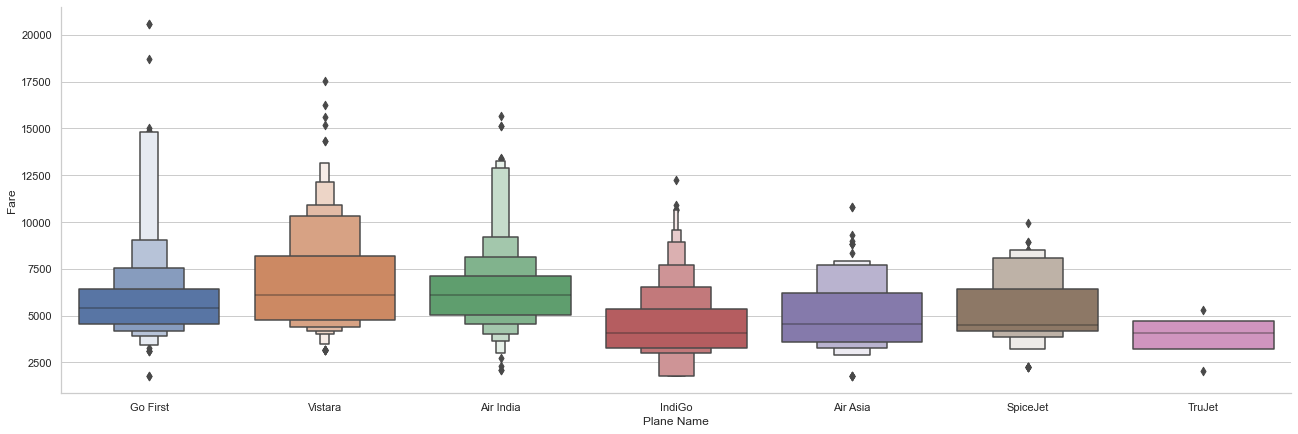

In [94]:

#airline/price
sns.catplot(y = "Fare", x = "Plane Name", data = df.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
#go fist has the highest fare and the lowest also

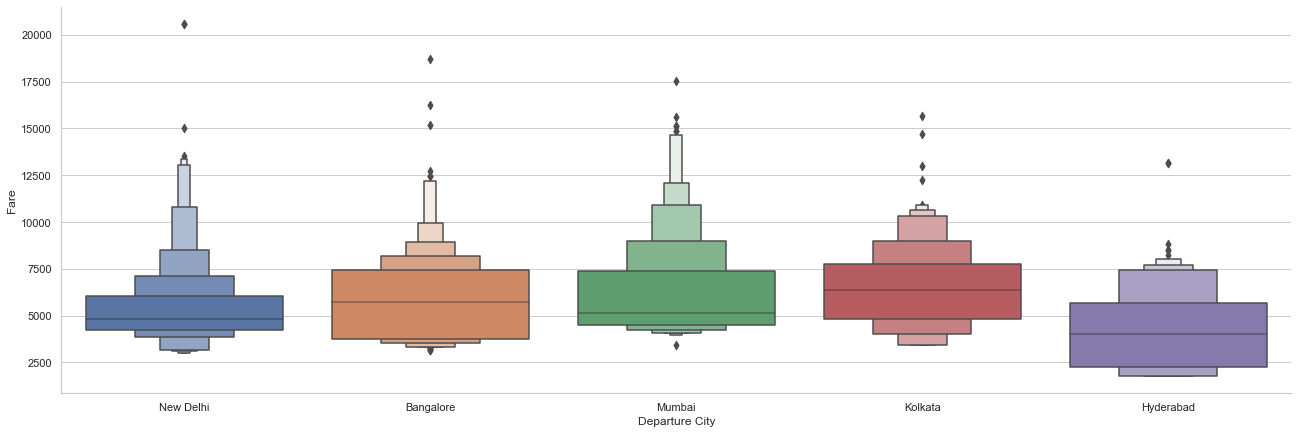

In [95]:

#Departure City/FAre
sns.catplot(y = "Fare", x = "Departure City", data = df.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
# the flights that departs from delhi has more fare than others

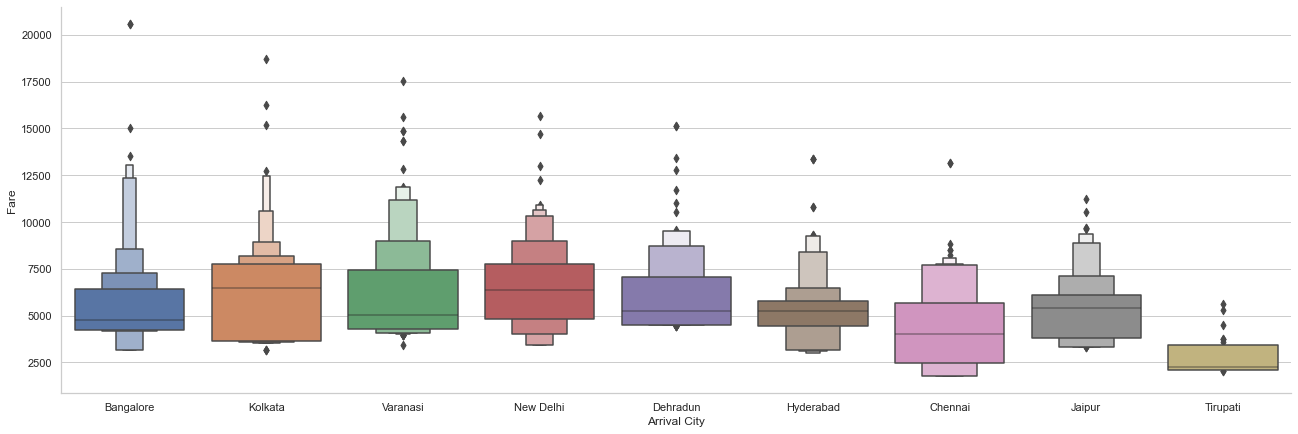

In [96]:

##Arrival City/FAre
sns.catplot(y = "Fare", x = "Arrival City", data = df.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
# the flights that arrive in banglore has more fare than others

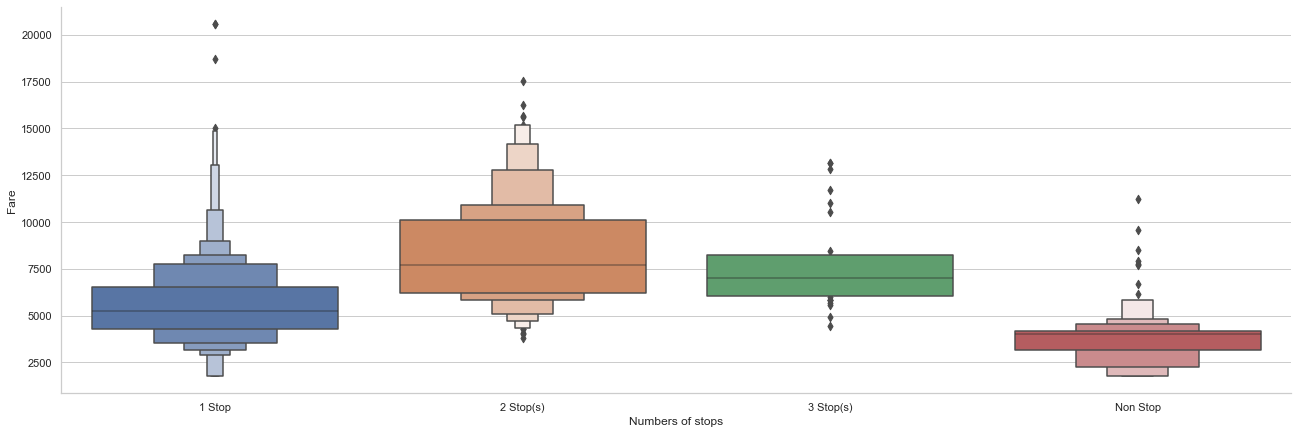

In [97]:

##Number of stops/FAre
sns.catplot(y = "Fare", x = "Numbers of stops", data = df.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
#the flight with 1 stops are more costly

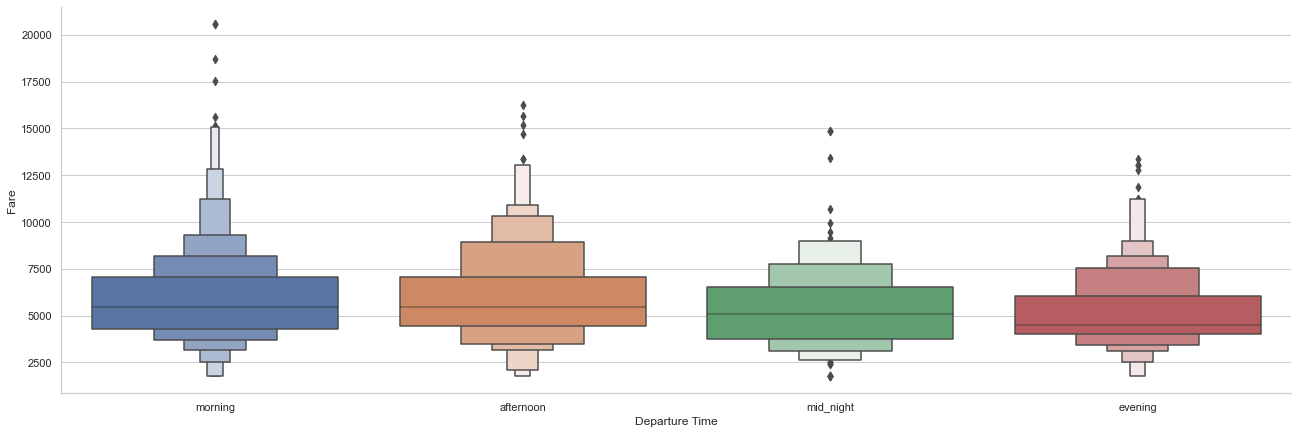

In [98]:

#Departure Time/FAre
sns.catplot(y = "Fare", x = "Departure Time", data = df.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
#fights that departs in the morning costs more

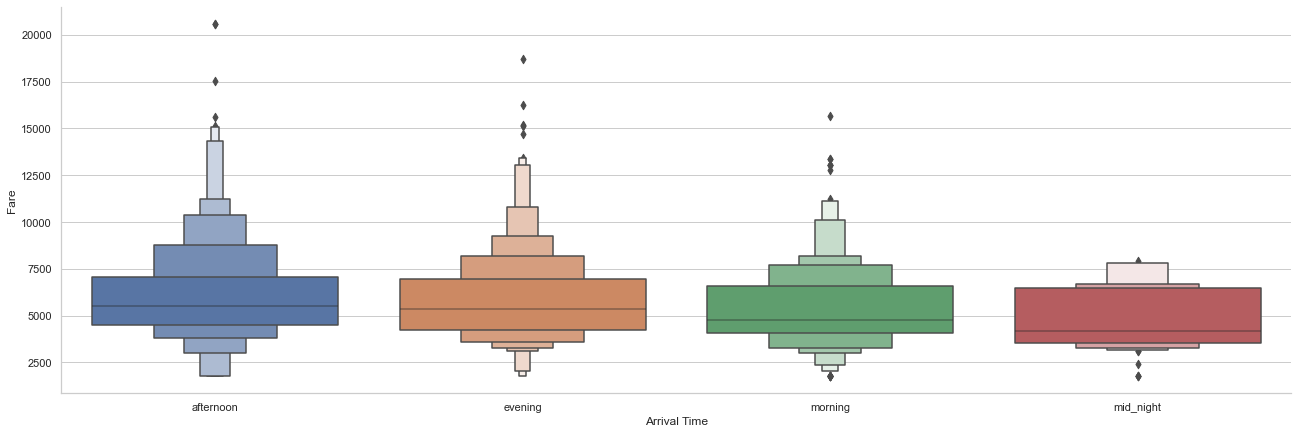

In [99]:
#Arrival Time/FAre
sns.catplot(y = "Fare", x = "Arrival Time", data = df.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
##the flights that lands in afternoon has more fair

Text(0, 0.5, 'Price of ticket')

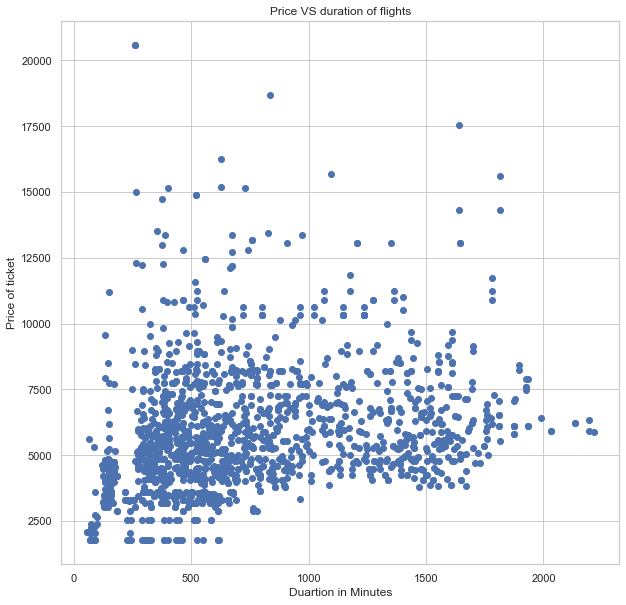

In [100]:
#Fare/duration
plt.figure(figsize = (10, 10))
plt.title('Price VS duration of flights')
plt.scatter(x='Time_taken', y='Fare',data=df)
plt.xlabel('Duartion in Minutes')
plt.ylabel('Price of ticket')

In [ ]:
#fare shows a liner relationship with time

In [102]:

# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Plane Name"]=encoder.fit_transform(df['Plane Name'])
df["Departure Time"]=encoder.fit_transform(df['Departure Time'])
df["Arrival Time"]=encoder.fit_transform(df['Arrival Time'])
df["Arrival City"]=encoder.fit_transform(df['Arrival City'])
df["Departure City"]=encoder.fit_transform(df['Departure City'])
df["Numbers of stops"]=encoder.fit_transform(df['Numbers of stops'])

<AxesSubplot:>

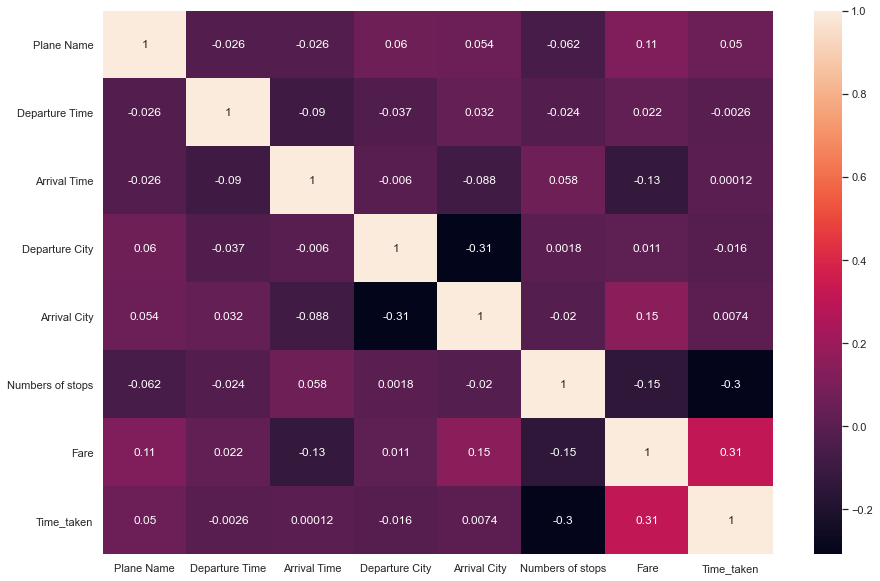

In [103]:
#checcking correlation
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)

In [ ]:
#fare is highly correlated with time taken

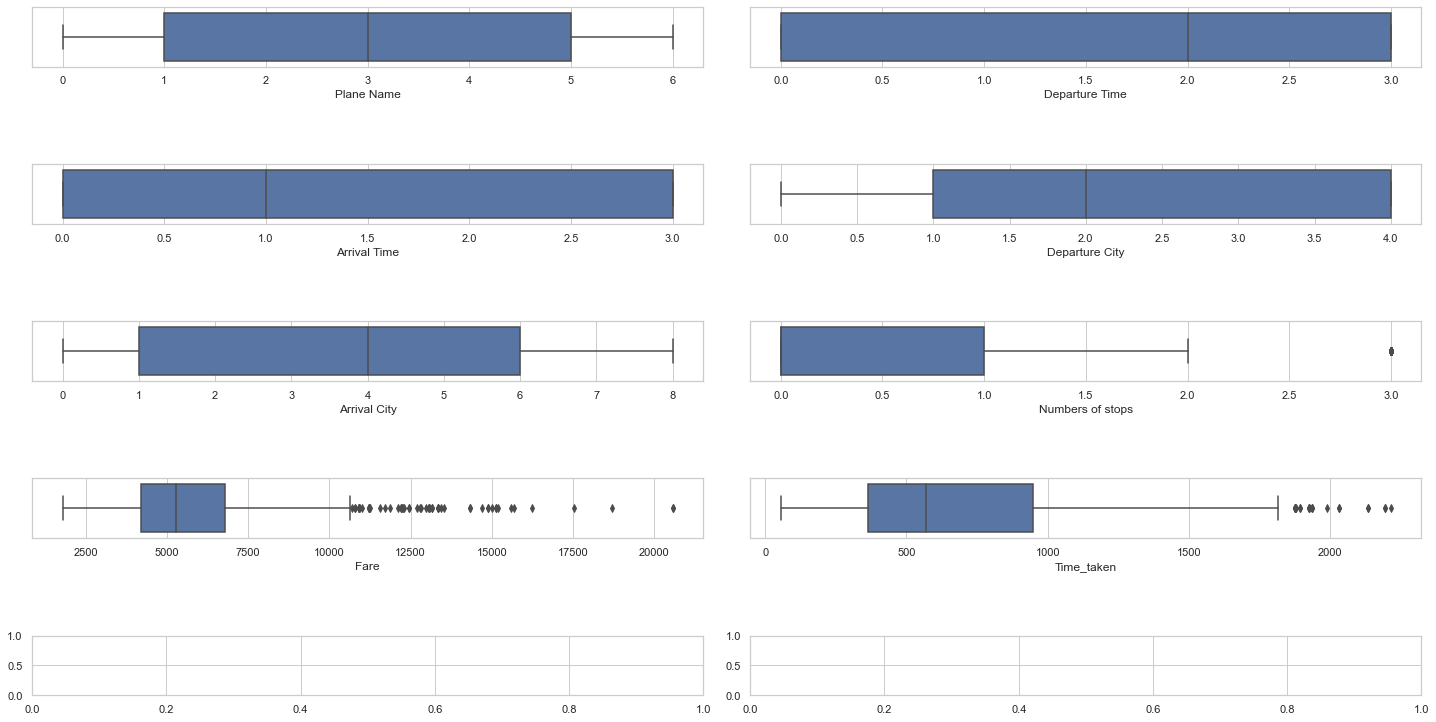

In [104]:

#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=2,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
#there are some outliers in Time taken

In [105]:
#removing outliers using zscore
from scipy.stats import  zscore
z=np.abs(zscore(df))
d1=df[(z<3).all(axis=1)]
d1

,Plane Name,Departure Time,Arrival Time,Departure City,Arrival City,Numbers of stops,Fare,Time_taken
0,3,0,1,4,0,0,3170,370
1,3,3,0,4,0,0,3170,385
2,3,3,0,4,0,0,3170,395
3,3,3,0,4,0,0,3170,435
4,3,0,1,4,0,0,3170,505
...,...,...,...,...,...,...,...,...
1793,6,0,0,2,6,1,10327,1145
1794,6,0,0,2,6,1,10327,1235
1795,6,0,0,2,6,1,10327,1235
1796,6,0,0,2,6,1,10327,1235


In [106]:
#checking skewness
d1.skew()

Plane Name          0.289905
Departure Time     -0.236942
Arrival Time        0.495382
Departure City     -0.218150
Arrival City        0.058182
Numbers of stops    1.593130
Fare                0.726690
Time_taken          0.824516
dtype: float64

In [107]:
#spliting data in x and y
x=d1.drop("Fare", axis=1)
x

,Plane Name,Departure Time,Arrival Time,Departure City,Arrival City,Numbers of stops,Time_taken
0,3,0,1,4,0,0,370
1,3,3,0,4,0,0,385
2,3,3,0,4,0,0,395
3,3,3,0,4,0,0,435
4,3,0,1,4,0,0,505
...,...,...,...,...,...,...,...
1793,6,0,0,2,6,1,1145
1794,6,0,0,2,6,1,1235
1795,6,0,0,2,6,1,1235
1796,6,0,0,2,6,1,1235


In [108]:
y=d1["Fare"]
y

0        3170
1        3170
2        3170
3        3170
4        3170
        ...  
1793    10327
1794    10327
1795    10327
1796    10327
1797    10327
Name: Fare, Length: 1762, dtype: int32

In [109]:
# treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
df_new.skew()


Plane Name         -0.090277
Departure Time     -0.275701
Arrival Time       -0.001200
Departure City     -0.284057
Arrival City       -0.213524
Numbers of stops    0.936425
Time_taken         -0.049918
dtype: float64

In [110]:
x=df_new

In [111]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [112]:
#spliting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=56)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1409, 7), (1409,), (353, 7), (353,))

In [113]:
#creating function 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
    print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
    print("""r2 score is:
    
    """,r2_score(y_test,predict))
    
    print("cross_val_score", cross_val_score(model,x,y,cv=5).mean())

In [114]:
#LineraRegression
model(LinearRegression)

mean squared error is:
     3196099.2223078595
The mean absolute error is:  1433.8667941113072
r2 score is:
    
     0.25193402513999397
cross_val_score 0.01665777802732844


In [115]:
#decisiontreeregressor
model(DecisionTreeRegressor)

mean squared error is:
     2363036.6491942084
The mean absolute error is:  839.0975448536356
r2 score is:
    
     0.44691726018038
cross_val_score -0.10927674293391207


In [116]:
#randomforestregressor
model(RandomForestRegressor)

mean squared error is:
     1783233.990097756
The mean absolute error is:  826.5791080709895
r2 score is:
    
     0.5826235105921618
cross_val_score 0.18439391680321432


In [117]:
#extratreesreressor
model(ExtraTreesRegressor)

mean squared error is:
     1850607.3519434037
The mean absolute error is:  735.0998276676108
r2 score is:
    
     0.5668543757490115
cross_val_score 0.26765398963420817


In [118]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
model(KNeighborsRegressor)

mean squared error is:
     2035756.295750708
The mean absolute error is:  991.4515580736545
r2 score is:
    
     0.5235191675749986
cross_val_score 0.18641650875801247


In [120]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [121]:
#BaggingRegressor
model(BaggingRegressor)

mean squared error is:
     1902014.1508659858
The mean absolute error is:  853.4602678954662
r2 score is:
    
     0.5548223096347795
cross_val_score 0.1942141606833171


In [122]:
#AdaBoostRegressor
model(AdaBoostRegressor)

mean squared error is:
     2740863.4334033416
The mean absolute error is:  1371.8428089522315
r2 score is:
    
     0.3584846609403801
cross_val_score 0.13555571274459


In [123]:
#GradientBoostingRegressor
model(GradientBoostingRegressor)

mean squared error is:
     1808658.1876762426
The mean absolute error is:  974.2160123596385
r2 score is:
    
     0.5766728263912969
cross_val_score 0.22778851239033598


In [125]:
#RandomForestregressor is the best model as the RMSLE is maxium
#setting parameters for hyperparameter tunning
parameter={
          "criterion":["mse","mae"],
          'max_features':['auto', 'sqrt',"log2"],
          'min_samples_split':[2, 5, 10, 15],
           'min_samples_leaf':[1, 2, 5, 10]}

In [126]:
#using GridSearchCV for Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [127]:

gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]})

In [128]:
#checking best parameters
gcv.best_params_

{'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [155]:
model=RandomForestRegressor(criterion="mse",max_features="auto",min_samples_leaf=1,min_samples_split=10)
model.fit(x_train,y_train)
pred=model.predict(x_test)
    
print("""mean squared error is:
    """,mean_squared_error(y_test, pred))
       
print("The mean absolute error is: ", mean_absolute_error(y_test,pred))
    
    
print("r2 score is:" ,r2_score(y_test,pred))

mean squared error is:
     1703762.375987915
The mean absolute error is:  881.7675187151985
r2 score is: 0.6012243131166367


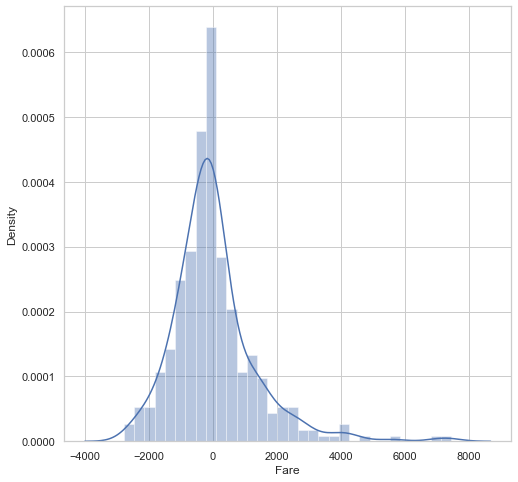

In [130]:
#plotting model distplot
plt.figure(figsize = (8,8))
sns.distplot(y_test-pred)
plt.show()